<h1 style="color:blue">Simulation Project Part 6</h1>
<h1>Mohammad Saeed Zare Mehrjardi - 99243037</h1>
<h1>Zahra Sadat Esmati Baygi - 99243053 </h1>

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import math
import random
from scipy.stats import norm
import scipy
import sys
import graph as gr
import seaborn as sns
import pandas as pd

# Draw PDF Plot

In [6]:
def draw_plot(x, y, xlabel="", ylable="", title=""):
    # Calculate additional statistics
    mean = np.mean(y)
    std = np.std(y)

    # CI
    lower_ci = y - np.mean(y) / np.sqrt(len(y))
    upper_ci = y + np.mean(y) / np.sqrt(len(y))

    # Create the figure and axes
    fig, ax = plt.subplots()

    # Plot the curve and fill between the CI
    ax.plot(x, y, color='b', label=title)
    ax.fill_between(x, lower_ci, upper_ci, color='lightblue', alpha=0.7 , label='CI')

    # Set the title and labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylable)

    # Customize the ticks and grid
    ax.xaxis.set_tick_params(which='both', direction='in', bottom=True, top=True)
    ax.yaxis.set_tick_params(which='both', direction='in', left=True, right=True)
    ax.grid(True, linestyle='--', alpha=0.5)

    # Add a legend
    ax.legend(loc='upper right')

    # Add statistics annotations
    ax.text(0.1, 0.9, f"Mean: {mean:.2f}", transform=ax.transAxes)
    ax.text(0.1, 0.85, f"Standard Deviation: {std:.2f}", transform=ax.transAxes)

    # Customize the figure background
    fig.patch.set_facecolor('lightgray')

    # Show the plot
    plt.show()

# Sample k-Regular Graph

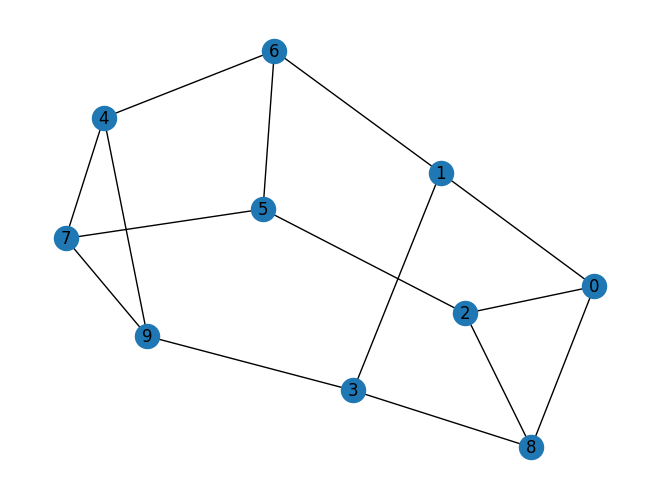

In [7]:
n = 10
d = 3
seed = 60

rg = nx.random_regular_graph(d, n, seed)

nx.draw(rg, with_labels=True)
plt.show()

# Compate two sets of Graph (RSRBG vs K-Regular)
## N = 496 , average degree = 6

# Create 1000 k-regular graph dataset 

In [24]:
# create dataset of 6-regular graph with size 500 (1000 graphs)
number_of_simulation = 1000
n = 20
d = 4
seed = 60

reg_graphs = []
rg_degrees = []
rg_eigens = []
for _ in range(number_of_simulation):
    rg = nx.random_regular_graph(d, n, seed)
    
    rg_degrees += [d for n, d in rg.degree()]
    rg_eigens += gr.complex_abs(gr.adjacency_eigen_values(rg))
    
    reg_graphs.append(rg)

### Degree Distribution

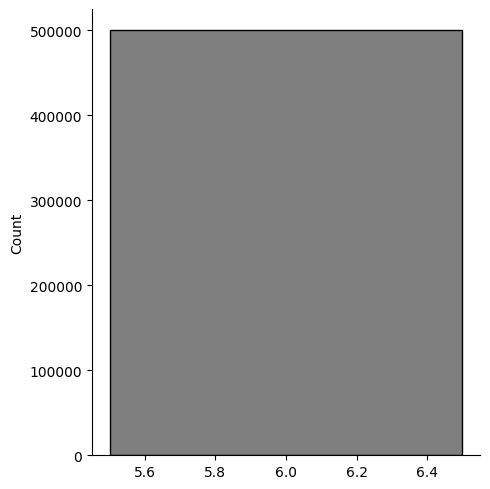

In [20]:
sns.displot(rg_degrees, kde=True, color="black")

### Eigen Values Distribution

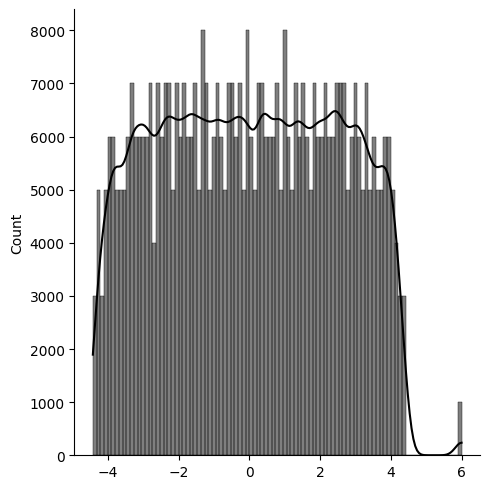

In [21]:
sns.displot(rg_eigens, kde=True, color="black")

### Calculate Probability of inconsistency

In [ ]:
table = []

# cut from 1 to 50 %
for cut in np.arange(0, 101, 0.05):
    disconnected = 0
    
    print (cut)
    
    for reg in reg_graphs:
        reg_copy = reg.copy()
        n = len(list(reg_copy.edges()))
        number_of_cuts = (cut * n) / 100
        
        nc = 0
        ec = 0
        ac = 0
        
        for _ in range(int(number_of_cuts)):
            if len(list(reg_copy.edges())) > 0:
                selected = random.choice(list(reg_copy.edges()))
                reg_copy.remove_edge(selected[0], selected[1])
                
        
        nc += nx.node_connectivity(reg_copy)
        ec += nx.edge_connectivity(reg_copy)
        ac += gr.algebraic_connectivity(reg_copy)
        
        connected = True
        if not nx.is_connected(reg_copy):
            connected = False 
            disconnected += 1
        
        
            
    print(disconnected)
    p = disconnected / len(reg_graphs)
    
    table.append([cut, number_of_cuts, disconnected, p, nc/len(reg_graphs), ec/len(reg_graphs), ac/len(reg_graphs)])
        
        

0.0
0
0.05
0
0.1
0
0.15000000000000002
0
0.2
0
0.25
0
0.30000000000000004
0
0.35000000000000003
0
0.4
0
0.45
0
0.5
0
0.55
0
0.6000000000000001
0
0.65
0
0.7000000000000001
0
0.75
0
0.8
0
0.8500000000000001
0
0.9
0
0.9500000000000001
0
1.0
0
1.05
0
1.1
0
1.1500000000000001
0
1.2000000000000002
0
1.25
0
1.3
0
1.35
0
1.4000000000000001
0
1.4500000000000002
0
1.5
0
1.55
0
1.6
0
1.6500000000000001
0
1.7000000000000002
0
1.75
0
1.8
0
1.85
0
1.9000000000000001
0
1.9500000000000002
0
2.0
0
2.0500000000000003
0
2.1
0
2.15
0
2.2
0
2.25
0
2.3000000000000003
0
2.35
0
2.4000000000000004
0
2.45
0
2.5
0
2.5500000000000003
0
2.6
0
2.6500000000000004
0
2.7
0
2.75
0
2.8000000000000003
0
2.85
0
2.9000000000000004
0
2.95
0
3.0
0
3.0500000000000003
0
3.1
0
3.1500000000000004
0
3.2
0
3.25
0
3.3000000000000003
0
3.35
0
3.4000000000000004
0
3.45
0
3.5
0
3.5500000000000003
0
3.6
0
3.6500000000000004
0
3.7
0
3.75
0
3.8000000000000003
0
3.85
0
3.9000000000000004
0
3.95
0
4.0
0
4.05
0
4.1000000000000005
0
4.15
0
4

111
32.45
108
32.5
166
32.550000000000004
164
32.6
160
32.65
151
32.7
158
32.75
187
32.800000000000004
164
32.85
185
32.9
174
32.95
188
33.0
160
33.050000000000004
157
33.1
183
33.15
167
33.2
169
33.25
169
33.300000000000004
175
33.35
188
33.4
148
33.45
160
33.5
170
33.550000000000004
188
33.6
168
33.65
194
33.7
183
33.75
153
33.800000000000004
178
33.85
173
33.9
161
33.95
172
34.0
178
34.050000000000004
170
34.1
185
34.15
175
34.2
154
34.25
168
34.300000000000004
156
34.35
161
34.4
160
34.45
164
34.5
142
34.550000000000004
195
34.6
170
34.65
171
34.7
160
34.75
160
34.800000000000004
168
34.85
164
34.9
181
34.95
172
35.0
240
35.050000000000004
246
35.1
244
35.15
243
35.2
222
35.25
238
35.300000000000004
266
35.35
220
35.4
261
35.45
244
35.5
240
35.550000000000004
238
35.6
223
35.65
227
35.7
236
35.75
228
35.800000000000004
218
35.85
228
35.9
249
35.95
237
36.0
245
36.050000000000004
243
36.1
227
36.15
240
36.2
263
36.25
243
36.300000000000004
231
36.35
241
36.4
218
36.45
217
36.5
233
3

1000
60.650000000000006
1000
60.7
1000
60.75
1000
60.800000000000004
1000
60.85
1000
60.900000000000006
1000
60.95
1000
61.0
1000
61.050000000000004
1000
61.1
1000
61.150000000000006
1000
61.2
1000
61.25
1000
61.300000000000004
1000
61.35
1000
61.400000000000006
1000
61.45
1000
61.5
1000
61.550000000000004
1000
61.6
1000
61.650000000000006
1000
61.7
1000
61.75
1000
61.800000000000004
1000
61.85
1000
61.900000000000006
1000
61.95
1000
62.0
1000
62.050000000000004
1000
62.1
1000
62.150000000000006
1000
62.2
1000
62.25
1000
62.300000000000004
1000
62.35
1000
62.400000000000006
1000
62.45
1000
62.5
1000
62.550000000000004
1000
62.6
1000
62.650000000000006
1000
62.7
1000
62.75
1000
62.800000000000004


In [18]:
df = pd.DataFrame(table, columns=['cut(%)', 'number of cuts', 'number of disconnected', 'possibility of inconsistency',
                                 'node connectivity', 'edge connectivity', 'algebratic connectivity'])
df

cut(%)  number of cuts  number of disconnected  \
0        1           14.88                       0   
1        2           29.76                       0   
2        3           44.64                       0   
3        4           59.52                       0   
4        5           74.40                       0   
5        6           89.28                       0   
6        7          104.16                       0   
7        8          119.04                       0   
8        9          133.92                       0   
9       10          148.80                       0   
10      11          163.68                       0   
11      12          178.56                       0   
12      13          193.44                       0   
13      14          208.32                       0   
14      15          223.20                       0   
15      16          238.08                       0   
16      17          252.96                       0   
17      18          267.84                       0   
18      19          282.72                       0   
19      20          297.60                       0   
20      21          312.48                       0   
21      22          327.36                       0   
22      23          342.24                       0   
23      24          357.12                       0   
24      25          372.00                       1   
25      26          386.88                       0   
26      27          401.76                       0   
27      28          416.64                       0   
28      29          431.52                       1   
29      30          446.40                       0   
30      31          461.28                       0   
31      32          476.16                       1   
32      33          491.04                       1   
33      34          505.92                       2   
34      35          520.80                       2   
35      36          535.68                       0   
36      37          550.56                       2   
37      38          565.44                       2   
38      39          580.32                       1   

    possibility of inconsistency  node connectivity  edge connectivity  \
0                            0.0                2.5                2.5   
1                            0.0                2.0                2.0   
2                            0.0                2.0                2.0   
3                            0.0                1.5                1.5   
4                            0.0                1.5                1.5   
5                            0.0                1.5                1.5   
6                            0.0                1.5                1.5   
7                            0.0                1.5                1.5   
8                            0.0                1.0                1.0   
9                            0.0                1.5                1.5   
10                           0.0                1.5                1.5   
11                           0.0                1.0                1.0   
12                           0.0                1.0                1.0   
13                           0.0                1.0                1.0   
14                           0.0                0.5                0.5   
15                           0.0                1.0                1.0   
16                           0.0                1.0                1.0   
17                           0.0                1.0                1.0   
18                           0.0                0.5                0.5   
19                           0.0                0.5                0.5   
20                           0.0                1.0                1.0   
21                           0.0                0.5                0.5   
22                           0.0                0.5                0.5   
23                           0.0                0.5                

### 6-Regular Probability Of Inconsistancy

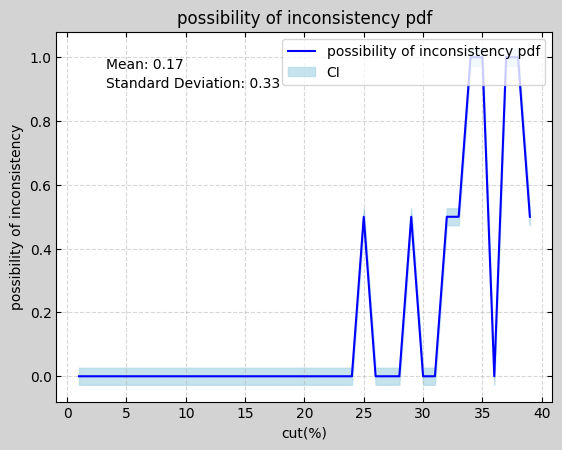

In [19]:
c = df['cut(%)']
p = df['possibility of inconsistency']

draw_plot(c, p, "cut(%)", "possibility of inconsistency", "possibility of inconsistency pdf")

### 6-Regular Node Connectivity

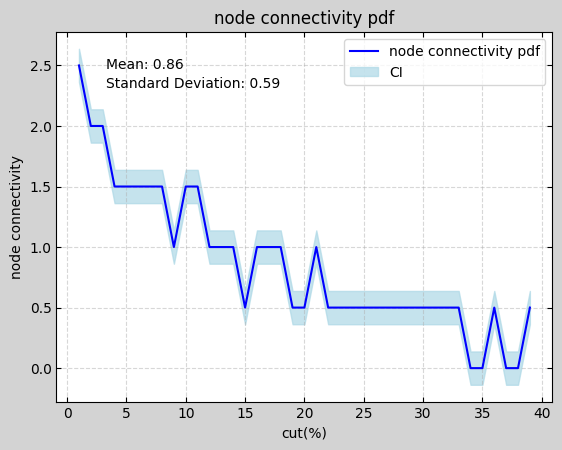

In [20]:
c = df['cut(%)']
p = df['node connectivity']

draw_plot(c, p, "cut(%)", "node connectivity", "node connectivity pdf")

### 6-Regular Edge Connectivity

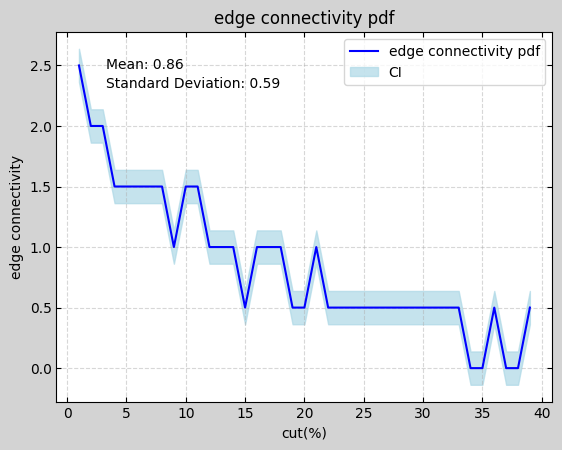

In [21]:
c = df['cut(%)']
p = df['edge connectivity']

draw_plot(c, p, "cut(%)", "edge connectivity", "edge connectivity pdf")

### 6-Regular algebratic Connectivity

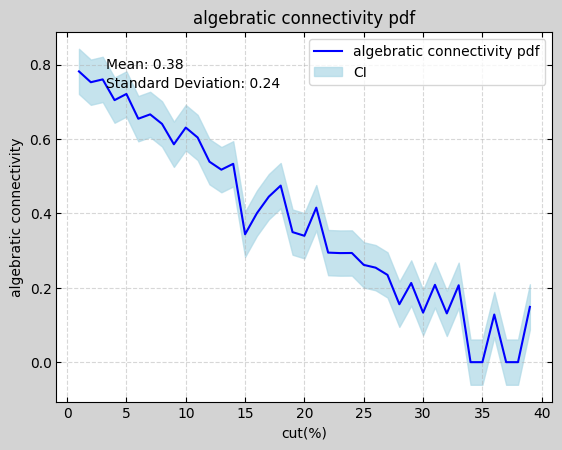

In [22]:
c = df['cut(%)']
p = df['algebratic connectivity']

draw_plot(c, p, "cut(%)", "algebratic connectivity", "algebratic connectivity pdf")

In [23]:
# Create 1000 RSRBG graph dataset

In [28]:
# create dataset of 6-regular graph with size 500 (1000 graphs)
number_of_simulation = 5
n = 496
d1 = 4
d2 = 12

rsrbg_graphs = []
rsrbg_degrees = []
rsrbg_eigens = []
for _ in range(number_of_simulation):
    rsrbg = gr.RSRBG(n, d1, d2)[0]
    
    rsrbg_degrees += [d for n, d in rsrbg.degree()]
    rsrbg_eigens += gr.complex_abs(gr.adjacency_eigen_values(rsrbg))
    
    rsrbg_graphs.append(rsrbg)

### RSRBG Degree Distribution

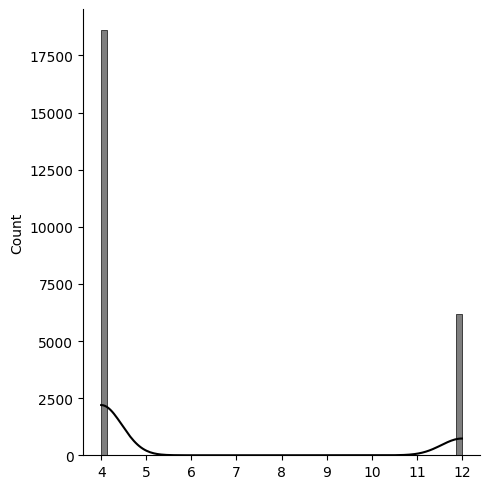

In [25]:
sns.displot(rsrbg_degrees, kde=True, color="black")

### RSRBG Eigen Values Distribution

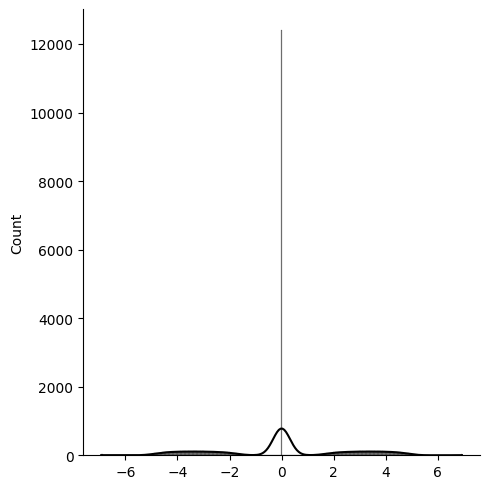

In [26]:
sns.displot(rsrbg_eigens, kde=True, color="black")

### Calculate Probability of inconsistency

In [29]:
rsrbg_table = []

# cut from 1 to 50 %
for cut in range(1, 40):
    disconnected = 0
    
    for reg in rsrbg_graphs:
        reg_copy = reg.copy()
        n = len(list(reg_copy.edges()))
        number_of_cuts = (cut * n) / 100
        
        nc = 0
        ec = 0
        ac = 0
        
        for _ in range(int(number_of_cuts)):
            if len(list(reg_copy.edges())) > 0:
                selected = random.choice(list(reg_copy.edges()))
                reg_copy.remove_edge(selected[0], selected[1])
        
        nc += nx.node_connectivity(reg_copy)
        ec += nx.edge_connectivity(reg_copy)
        ac += gr.algebraic_connectivity(reg_copy)
                
        
        connected = True
        if not nx.is_connected(reg_copy):
            connected = False 
            disconnected += 1
            
    print(disconnected)
    p = disconnected / len(reg_graphs) 
    rsrbg_table.append([cut, number_of_cuts, disconnected, p, nc/len(rsrbg_graphs), ec/len(rsrbg_graphs), ac/len(rsrbg_graphs)])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
3
4
1
3
1
4
4
5
5
4
4
5
5
5
5
5
5
5
5
5
5
5


In [30]:
rdf = pd.DataFrame(rsrbg_table, columns=['cut(%)', 'number of cuts', 'number of disconnected', 'possibility of inconsistency',
                                        'node connectivity', 'edge connectivity', 'algebratic connectivity'])
rdf

cut(%)  number of cuts  number of disconnected  \
0        1           14.88                       0   
1        2           29.76                       0   
2        3           44.64                       0   
3        4           59.52                       0   
4        5           74.40                       0   
5        6           89.28                       0   
6        7          104.16                       0   
7        8          119.04                       0   
8        9          133.92                       0   
9       10          148.80                       0   
10      11          163.68                       0   
11      12          178.56                       0   
12      13          193.44                       0   
13      14          208.32                       0   
14      15          223.20                       1   
15      16          238.08                       1   
16      17          252.96                       1   
17      18          267.84                       3   
18      19          282.72                       4   
19      20          297.60                       1   
20      21          312.48                       3   
21      22          327.36                       1   
22      23          342.24                       4   
23      24          357.12                       4   
24      25          372.00                       5   
25      26          386.88                       5   
26      27          401.76                       4   
27      28          416.64                       4   
28      29          431.52                       5   
29      30          446.40                       5   
30      31          461.28                       5   
31      32          476.16                       5   
32      33          491.04                       5   
33      34          505.92                       5   
34      35          520.80                       5   
35      36          535.68                       5   
36      37          550.56                       5   
37      38          565.44                       5   
38      39          580.32                       5   

    possibility of inconsistency  node connectivity  edge connectivity  \
0                            0.0                0.4                0.4   
1                            0.0                0.4                0.4   
2                            0.0                0.4                0.4   
3                            0.0                0.4                0.4   
4                            0.0                0.4                0.4   
5                            0.0                0.4                0.4   
6                            0.0                0.2                0.2   
7                            0.0                0.2                0.2   
8                            0.0                0.2                0.2   
9                            0.0                0.2                0.2   
10                           0.0                0.2                0.2   
11                           0.0                0.2                0.2   
12                           0.0                0.2                0.2   
13                           0.0                0.2                0.2   
14                           0.5                0.2                0.2   
15                           0.5                0.0                0.0   
16                           0.5                0.0                0.0   
17                           1.5                0.0                0.0   
18                           2.0                0.2                0.2   
19                           0.5                0.2                0.2   
20                           1.5                0.0                0.0   
21                           0.5                0.2                0.2   
22                           2.0                0.2                0.2   
23                           2.0                0.0                

### RSRBG Probability

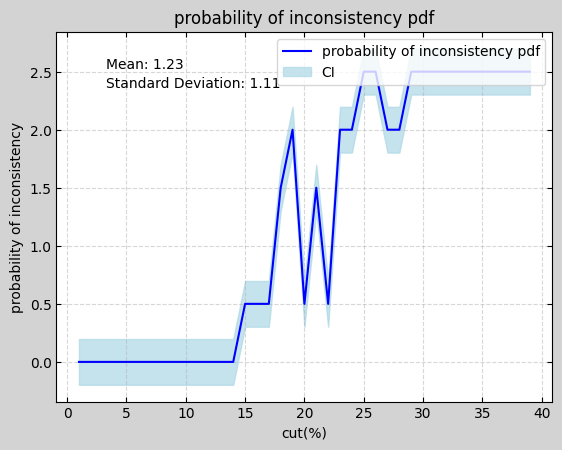

In [31]:
c = rdf['cut(%)']
p = rdf['possibility of inconsistency']

draw_plot(c, p, "cut(%)", "probability of inconsistency", "probability of inconsistency pdf")

### RSRBG Node Connectivity 

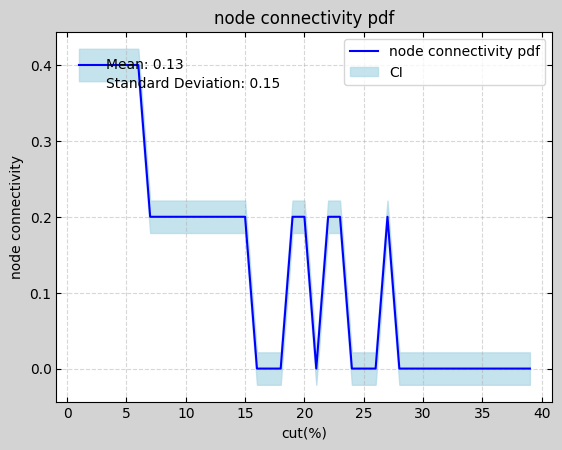

In [32]:
c = rdf['cut(%)']
p = rdf['node connectivity']

draw_plot(c, p, "cut(%)", "node connectivity", "node connectivity pdf")

### RSRBG Edge Connectivity 

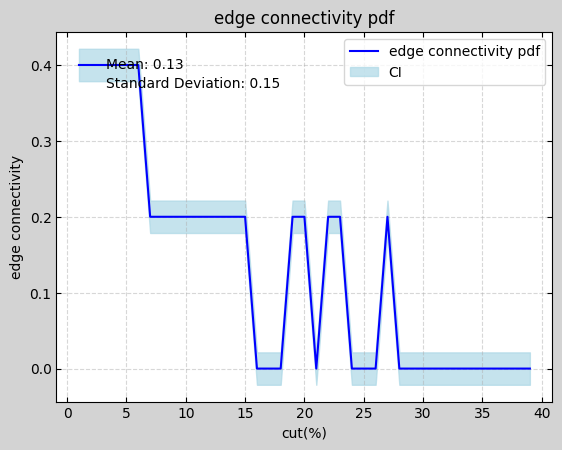

In [33]:
c = rdf['cut(%)']
p = rdf['edge connectivity']

draw_plot(c, p, "cut(%)", "edge connectivity", "edge connectivity pdf")

### RSRBG Algebratic Connectivity 

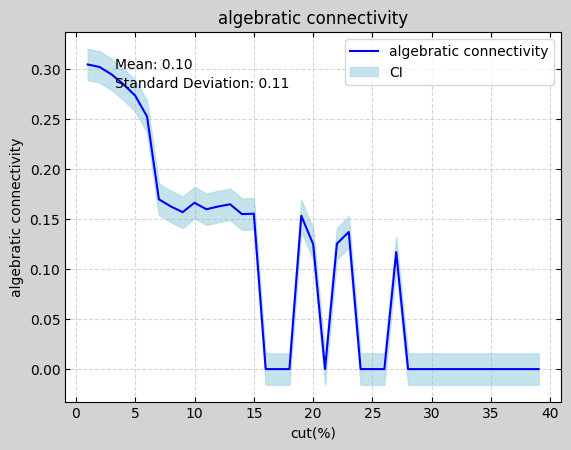

In [34]:
# Generate some data
x = rdf['cut(%)']
y = rdf['algebratic connectivity']

draw_plot(x, y, "cut(%)", "algebratic connectivity", "algebratic connectivity")


### RSRBG Algebratic Connectivity 

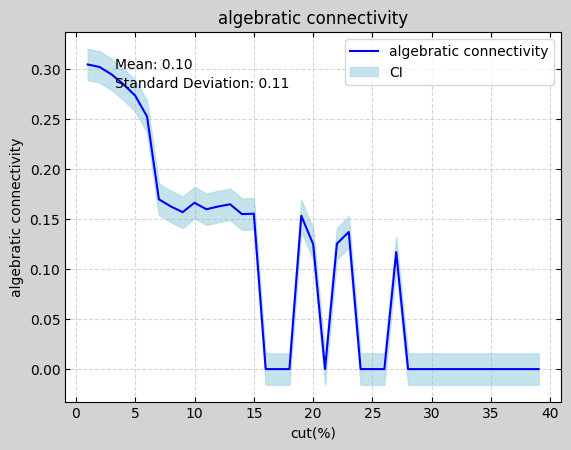

In [35]:
# Generate some data
x = rdf['cut(%)']
y = rdf['algebratic connectivity']

draw_plot(x, y, "cut(%)", "algebratic connectivity", "algebratic connectivity")
